In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('visualization_df.csv')

In [3]:
df

,query,spotify_map,features_map,popularity_map,features_and_popularity_map,spotify_dcg,features_dcg,popularity_dcg,features_and_popularity_dcg,spotify_ndcg,features_ndcg,popularity_ndcg,features_and_popularity_ndcg,spotify_recall,features_recall,popularity_recall,features_and_popularity_recall
0,q=calming%20reading%20inacafe%20,0.571429,1.000000,0.866667,1.000000,3.485034,2.948459,2.017783,2.948459,0.957953,1.000000,0.684352,1.000000,0.571429,0.833333,0.500000,0.833333
1,q=driving%20music%20in%20folk%20style%20for%20...,0.666667,0.866667,0.366667,1.000000,3.175020,2.017783,0.886853,1.630930,0.960769,0.684352,0.300785,0.553146,0.666667,0.428571,0.285714,0.285714
2,q=electronic%20calming%20driving%20,0.500000,0.805556,0.700000,0.700000,2.255392,1.930677,1.817529,1.817529,0.682487,0.654809,0.616434,0.616434,0.500000,0.500000,0.500000,0.500000
3,q=folk%20sad%20studying%20,0.500000,0.583333,0.500000,0.583333,2.566612,1.130930,1.061606,1.130930,0.776663,0.383566,0.360055,0.383566,0.500000,0.333333,0.333333,0.333333
4,q=intense%20workout%20playlist%20pop%20,0.571429,0.804167,0.755556,0.588889,3.409196,2.317529,1.886853,1.517783,0.937107,0.786014,0.639945,0.514771,0.571429,0.666667,0.500000,0.500000
5,q=metal%20energetic%20studying%20,0.500000,0.833333,0.638889,0.805556,2.808100,1.500000,1.561606,1.930677,0.849738,0.508740,0.529635,0.654809,0.500000,0.400000,0.600000,0.600000
6,q=partying%20calming%20hip-hop%20,0.500000,0.804167,0.755556,0.804167,2.464085,2.317529,1.886853,2.317529,0.745638,0.786014,0.639945,0.786014,0.500000,0.666667,0.500000,0.666667
7,q=rock%20sad%20workout%20,0.400000,0.588889,0.916667,0.805556,1.955646,1.517783,2.061606,1.930677,0.663277,0.514771,0.699215,0.654809,0.400000,0.500000,0.500000,0.500000
8,q=uplifting%20driving%20playlist%20reggae%20,0.714286,1.000000,0.804167,0.866667,3.620131,2.130930,2.317529,2.017783,0.995088,0.722727,0.786014,0.684352,0.714286,0.428571,0.571429,0.428571
9,q=working%20music%20in%20classical%20style%20f...,0.500000,0.950000,1.000000,1.000000,2.865458,2.517783,2.948459,2.948459,0.867095,0.853932,1.000000,1.000000,0.500000,0.571429,0.714286,0.714286


In [4]:
# Parse the query strings to remove extra characters like "%20"
df['parsed_query'] = df['query'].str.replace('%20', ' ').str.replace('q=', '').str.strip()

# Define the metrics and corresponding columns for each chart
metrics = {
    'MAP': ['spotify_map', 'features_map', 'popularity_map', 'features_and_popularity_map'],
    'DCG': ['spotify_dcg', 'features_dcg', 'popularity_dcg', 'features_and_popularity_dcg'],
    'NDCG': ['spotify_ndcg', 'features_ndcg', 'popularity_ndcg', 'features_and_popularity_ndcg'],
    'Recall': ['spotify_recall', 'features_recall', 'popularity_recall', 'features_and_popularity_recall']
}

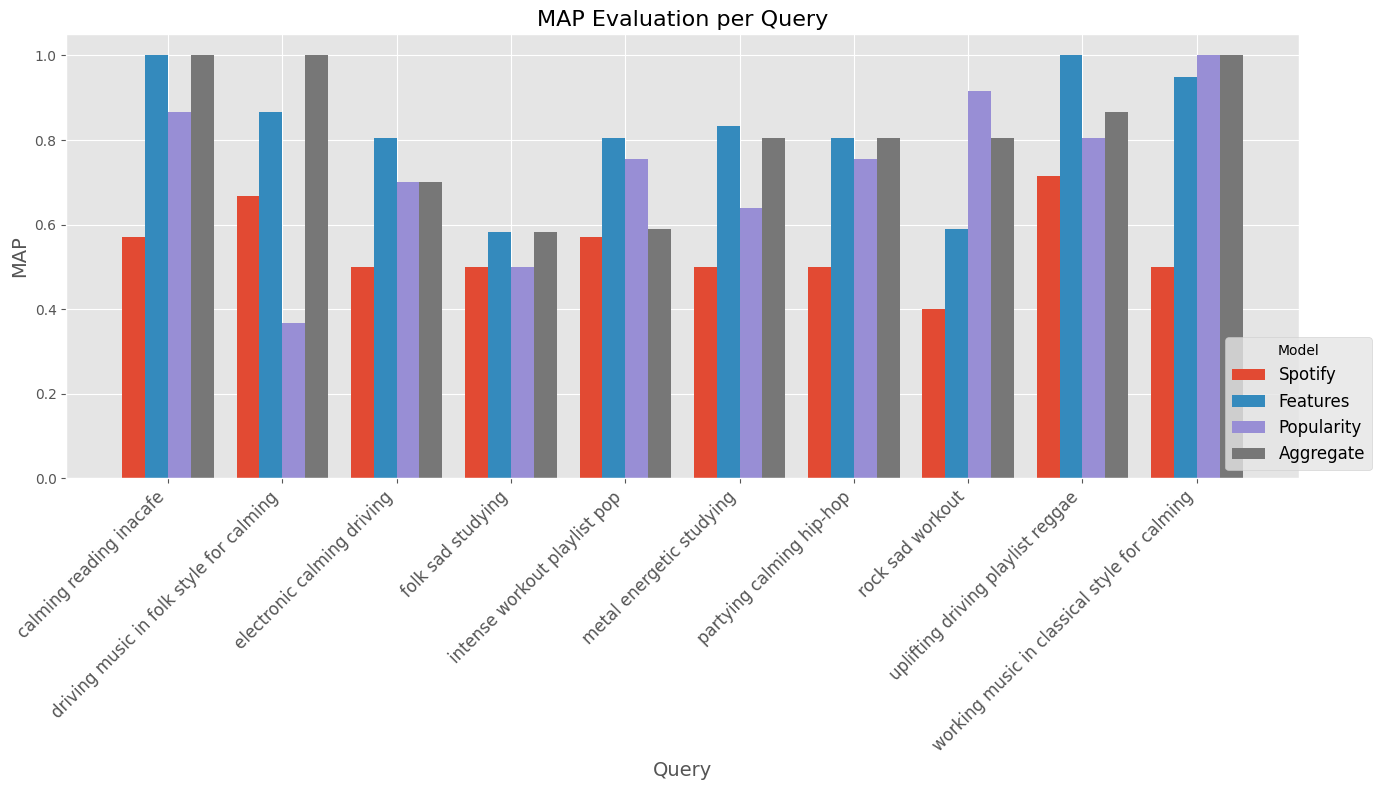

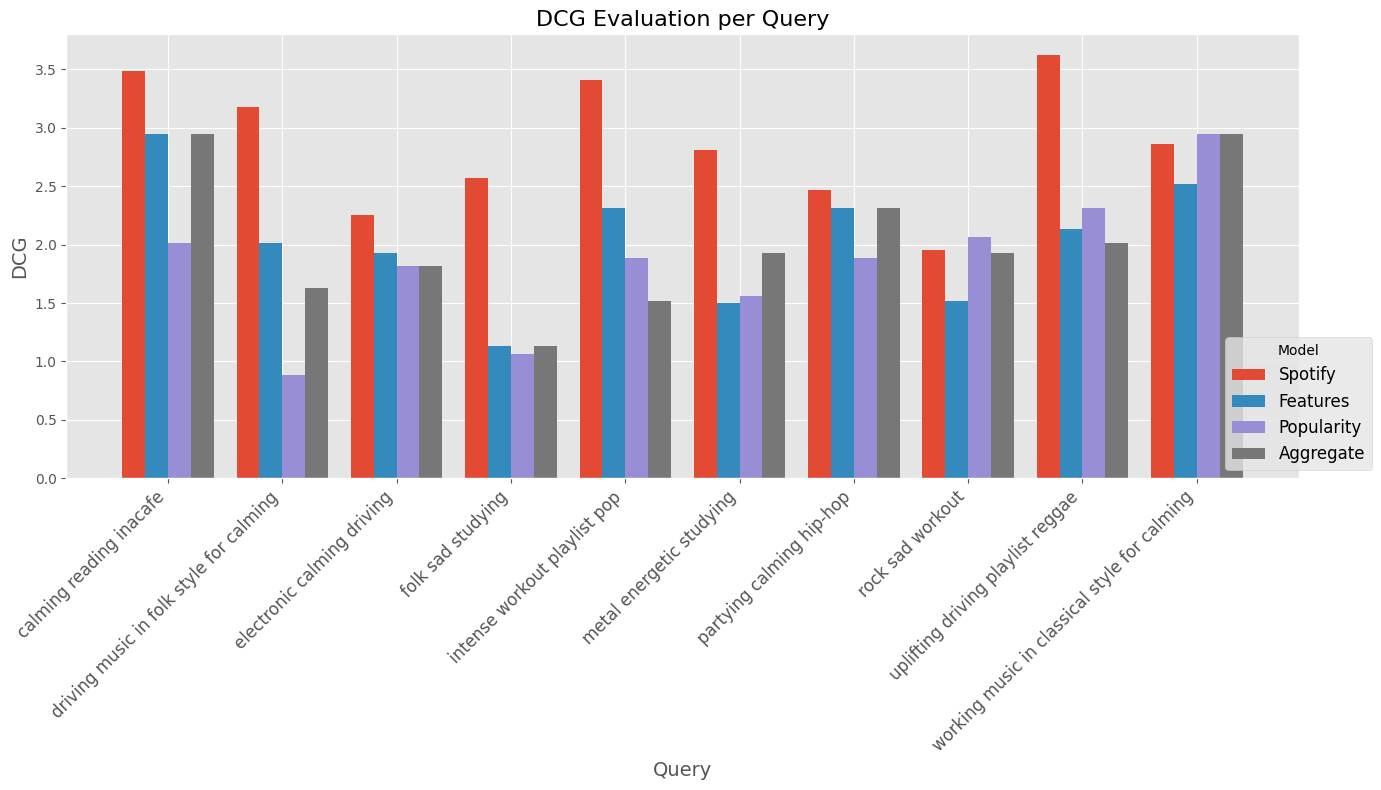

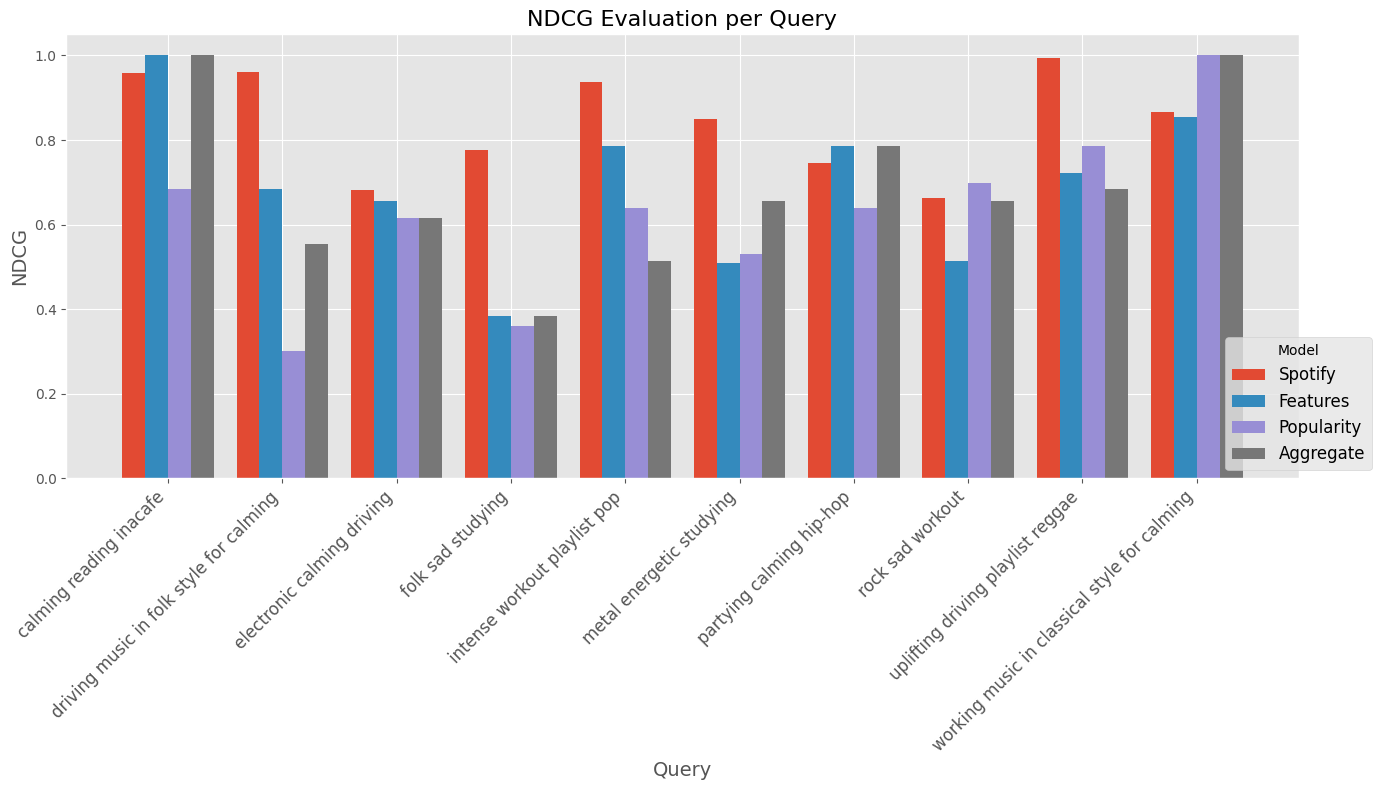

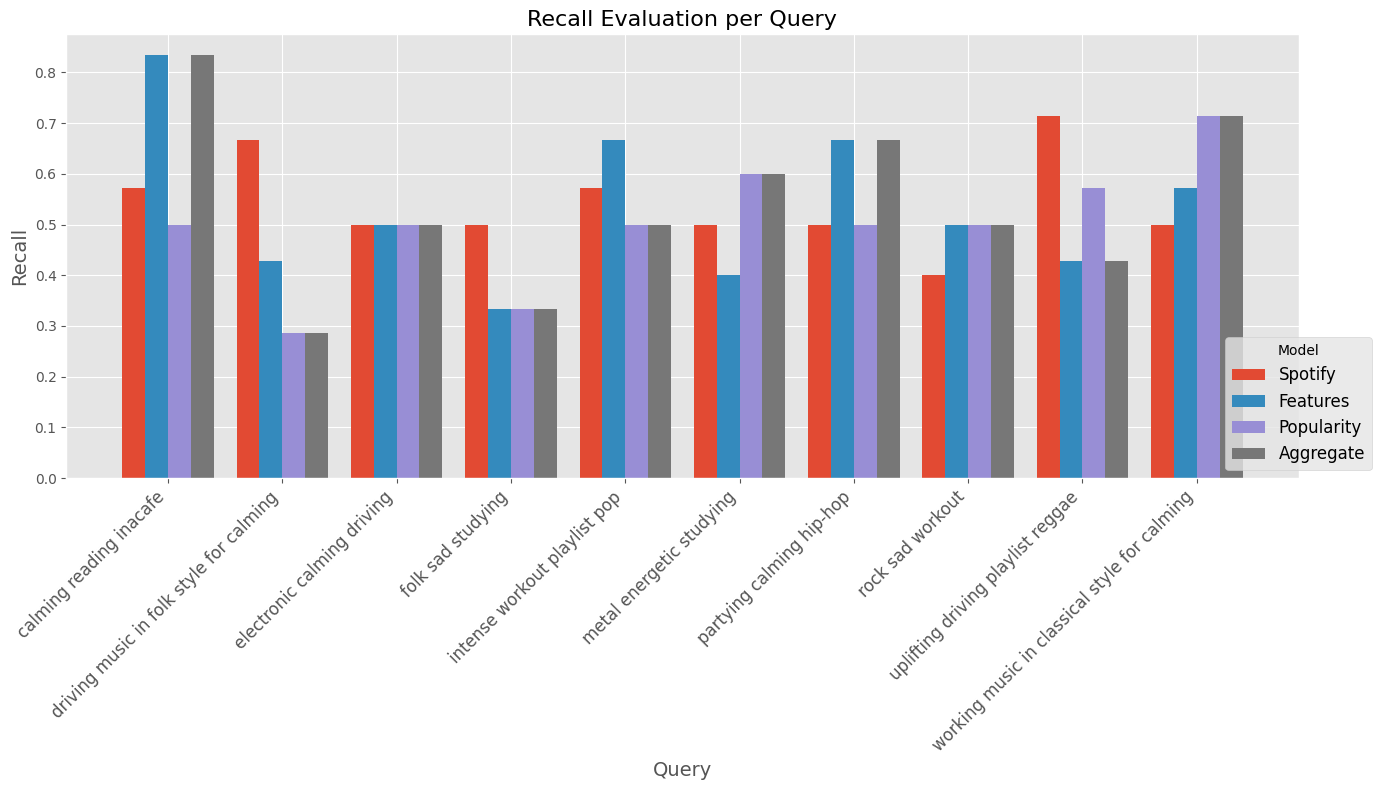

In [6]:
plt.style.use('ggplot')

# Iterate through each metric and create bar charts with the legend in the very bottom-right
for metric_name, columns in metrics.items():
    plt.figure(figsize=(14, 8))
    
    # Set bar width and positions
    x = np.arange(len(df['parsed_query']))
    bar_width = 0.2
    
    # Plot bars for each model
    for i, column in enumerate(columns):
        label = "Aggregate" if "features_and_popularity" in column else column.split('_')[0].capitalize()
        plt.bar(x + i * bar_width, df[column], width=bar_width, label=label)
    
    # Set chart labels and title
    plt.title(f'{metric_name} Evaluation per Query', fontsize=16)
    plt.xlabel('Query', fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.xticks(x + 1.5 * bar_width, df['parsed_query'], rotation=45, ha='right', fontsize=12)
    
    # Place legend in the bottom-right (outside the bars area)
    plt.legend(title='Model', fontsize=12, loc='lower center', bbox_to_anchor=(1.0, 0.0))
    plt.tight_layout()
    
    # Show each chart
    plt.show()